Датасет представляет собой реальные данные о гонщиках Формулы-1, принявших
участие
хотя бы в одной гонке, начиная с 1950 года.
Источник: https://www.kaggle.com/datasets/dubradave/formula-1-drivers-dataset

В датасете представлены следующие атрибуты:
Driver (str) - имя гонщика;
Nationality (str) - национальность гонщика;
Seasons (str) - сезоны, в которых гонщик принимал участие;
Championships (float) - количество выигранных чемпионств;
Race entries (float) - количество пройденных квалификаций;
Race starts (float) - количество начатых гонок;
Pole positions (float) - количество поул-позиций (первых мест в квалификации)
Race wins (float) - количество выигранных гонок;
Podiums (float) - количество подиумов (1, 2 или 3 место в гонке);
Fastest laps (float) - количество самых быстрых кругов;
Points (float) - всего очков;
Active (bool) - принимает ли участие в нынешнем сезоне (2023);
Championship Years (str) - сезоны, в которых гонщик стал чемпионом;
Decade (int) - декада;
Pole rate (float) - коэф. поул-позиций;
Start rate (float) - коэф. начатых гонок;
Win rate (float) - коэф. побед;
Podium rate (float) - коэф. попаданий на подиум;
Fast lap rate (float) - коэф. быстрого круга;
Points per entry (float) - среднее количество очков за гонку;
Years active (int) - количество сезонов, в которых гонщик принимал участие;
Champion (bool) - становился ли чемпионом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drivers_df = pd.read_csv('f1DriversDataset.csv')
drivers_df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [2]:
# добавление нового атрибута 'Did not start' - количество успешных
# квалификаций, но без старта
drivers_df['Did_Not_Start'] = drivers_df['Race_Entries'] - drivers_df['Race_Starts']
drivers_df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion,Did_Not_Start
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False,3.0
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False,0.0
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False,7.0
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False,6.0
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False,0.0


In [3]:
# количество пропусков по каждому атрибуту
drivers_df.isna().sum()

Driver                  0
Nationality             0
Seasons                 0
Championships           0
Race_Entries            0
Race_Starts             0
Pole_Positions          0
Race_Wins               0
Podiums                 0
Fastest_Laps            0
Points                  0
Active                  0
Championship Years    834
Decade                  0
Pole_Rate               0
Start_Rate              0
Win_Rate                0
Podium_Rate             0
FastLap_Rate            0
Points_Per_Entry        0
Years_Active            0
Champion                0
Did_Not_Start           0
dtype: int64

Как видно, пропуски имеются только в атрибуте Championship Years. Так как
этот атрибут является строкой в виде списка, содержащим чемпионские сезоны,
заменим все пропущенные значения на строчки с пустыми списками.

In [4]:
drivers_df['Championship Years'].fillna('[]', inplace=True)
drivers_df['Championship Years'].head()

0    []
1    []
2    []
3    []
4    []
Name: Championship Years, dtype: object

In [5]:
# удалим дубли
print(f'Rows: {len(drivers_df)}')
drivers_df.drop_duplicates(inplace=True)
print(f'Rows: {len(drivers_df)}')

Rows: 868
Rows: 868


Как видно, дублей в датасете не было. Теперь проанализируем датасет на
наличие выбросов.

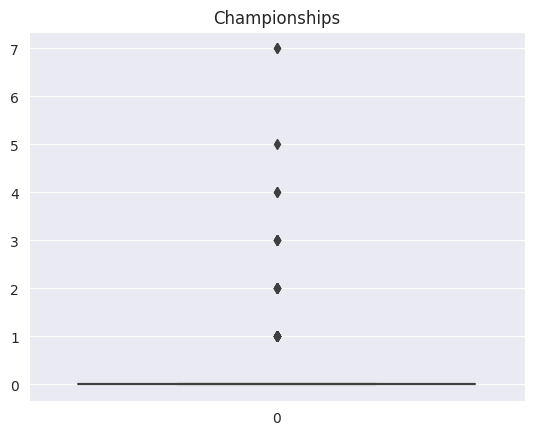

In [30]:
sns.boxplot(drivers_df['Championships'])
plt.title('Championships');

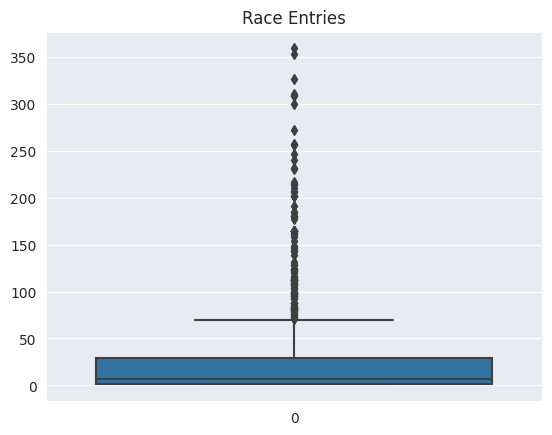

In [7]:
sns.boxplot(drivers_df['Race_Entries'])
plt.title('Race Entries');

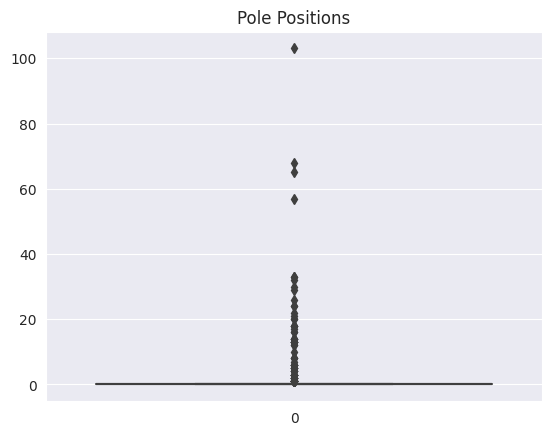

In [8]:
sns.boxplot(drivers_df['Pole_Positions'])
plt.title('Pole Positions');

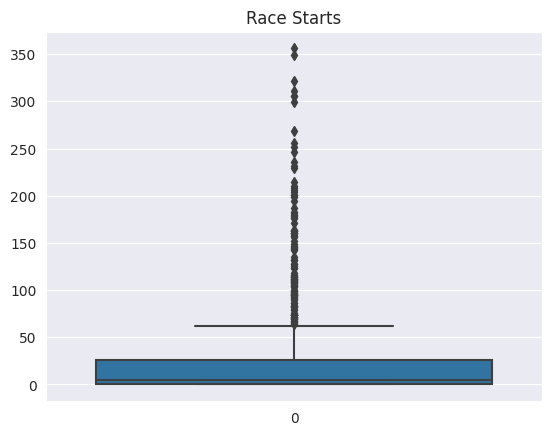

In [9]:
sns.boxplot(drivers_df['Race_Starts'])
plt.title('Race Starts');

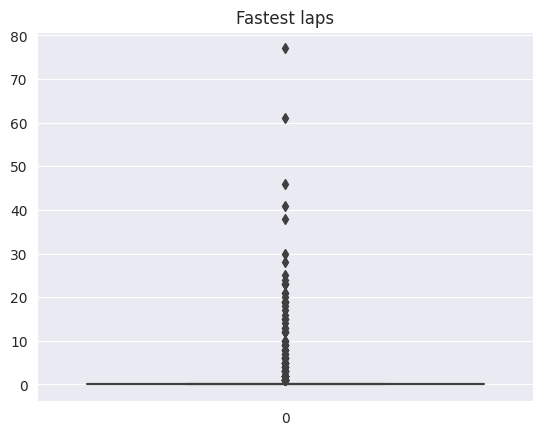

In [10]:
sns.boxplot(drivers_df['Fastest_Laps'])
plt.title('Fastest laps');

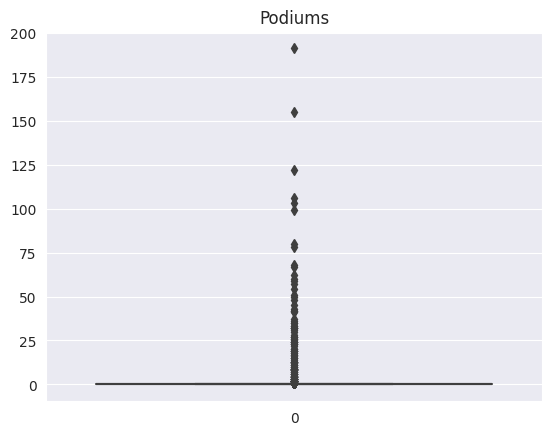

In [11]:
sns.boxplot(drivers_df['Podiums'])
plt.title('Podiums');

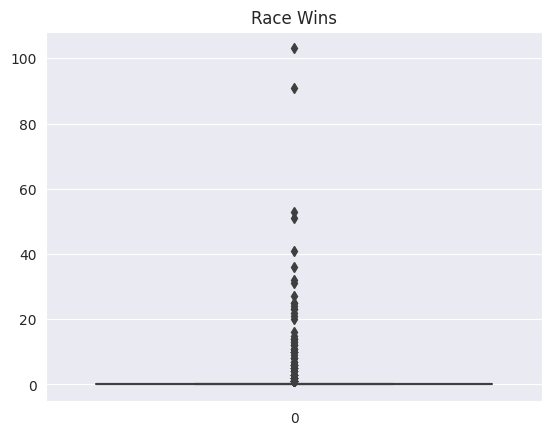

In [12]:
sns.boxplot(drivers_df['Race_Wins'])
plt.title('Race Wins');

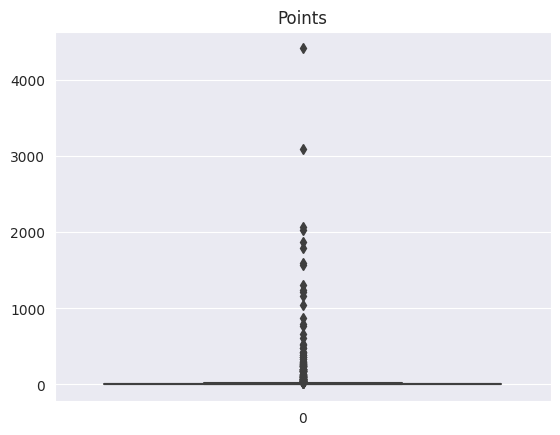

In [13]:
sns.boxplot(drivers_df['Points'])
plt.title('Points');

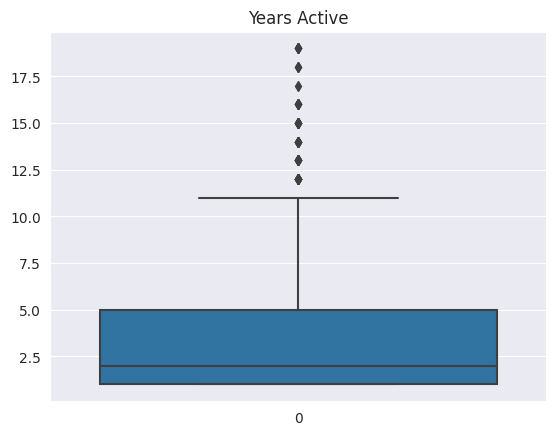

In [14]:
sns.boxplot(drivers_df['Years_Active'])
plt.title('Years Active');

Как видно из графиков выше, выбросов много. Но это скорее всего связано не с
качеством датасета, а с тем, что добиться хоть каких-либо результатов в
формуле 1 очень сложно, и поэтому достижения являются скорее исключением. И в
связи с этим 50% гонщиков остаются в формуле не более чем на 5 лет, как видно
 из графика выше.

Пропишем условия для того, чтобы выявить неправильные данные:

1. Years_Active должно совпадать с количеством Seasons;
2. Champion должно быть True, только если Championships > 0;
3. Pole_Rate должно равняться Pole_Positions / Race_Entries;
4. Start_Rate должно равняться Race_Starts / Race_Entries;
5. Win_Rate должно равняться Race_Wins / Race_Entries;
6. Podium_Rate = Podiums / Race_Entries;
7. FastLap_Rate = Fastest_Laps / Race_Entries;
8. Points_Per_Entry = Points / Race_Entries;
9. Количество Active, равных True, должно быть равно 20;
10. Race_Starts должно быть не больше Race_Entries.

In [15]:
# функция для перевода строки со списком сезонов в объект класса list
def len_of_items_in_string(input_string):
    input_string = input_string.replace('[', '').replace(']', '')
    output_list = input_string.split(', ')
    return len(output_list)

print(f'Rows before cleanup: {len(drivers_df)}')
drivers_df = drivers_df[
    (drivers_df['Seasons'].apply(len_of_items_in_string)
     == drivers_df['Years_Active'])

    & (((drivers_df['Champion'] == True) & (drivers_df['Championships'].apply
                                            (int) > 0))
       | ((drivers_df['Champion'] == False)
          & (np.isclose(drivers_df['Championships'], 0.0))))

    & (np.isclose(drivers_df['Pole_Rate'],
                  drivers_df['Pole_Positions'] / drivers_df['Race_Entries']))

    & (np.isclose(drivers_df['Start_Rate'],
                  drivers_df['Race_Starts'] / drivers_df['Race_Entries']))

    & (np.isclose(drivers_df['Win_Rate'],
                  drivers_df['Race_Wins'] / drivers_df['Race_Entries']))

    & (np.isclose(drivers_df['Podium_Rate'],
                  drivers_df['Podiums'] / drivers_df['Race_Entries']))

    & (np.isclose(drivers_df['FastLap_Rate'],
                  drivers_df['Fastest_Laps'] / drivers_df['Race_Entries']))

    & (np.isclose(drivers_df['Points_Per_Entry'],
                  drivers_df['Points'] / drivers_df['Race_Entries']))

    & (drivers_df['Race_Starts'].apply(int)
       <= drivers_df['Race_Entries'].apply(int))
    ]
print(f'Rows after cleanup: {len(drivers_df)}')
print(f'Active drivers: {len(drivers_df[drivers_df["Active"] == True])}')

Rows before cleanup: 868
Rows after cleanup: 868
Active drivers: 20


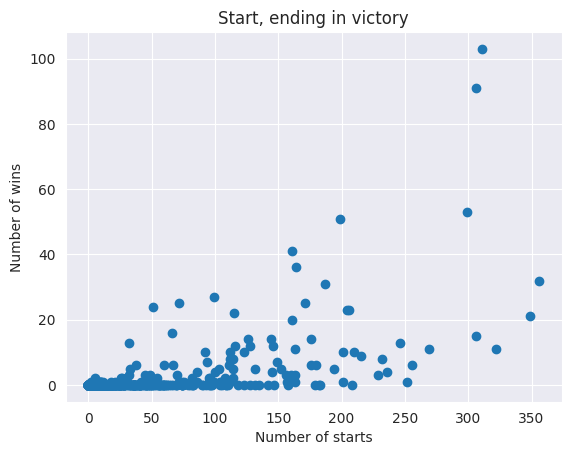

In [16]:
plt.scatter(drivers_df['Race_Starts'], drivers_df['Race_Wins'])
plt.xlabel('Number of starts')
plt.ylabel('Number of wins')
plt.title('Start, ending in victory')
plt.show()

На графике ярко выражена группа, имеющая до 150 - 200 стартов и при этом имеющая
малое количество побед. Отдельно стоящими являются те, у кого более 150 - 200
стартов и все так же малое количество побед; те, у кого менее 150 - 200
стартов и большое количество побед; несколько гонщиков с большим количеством
стартов и большим количеством побед.

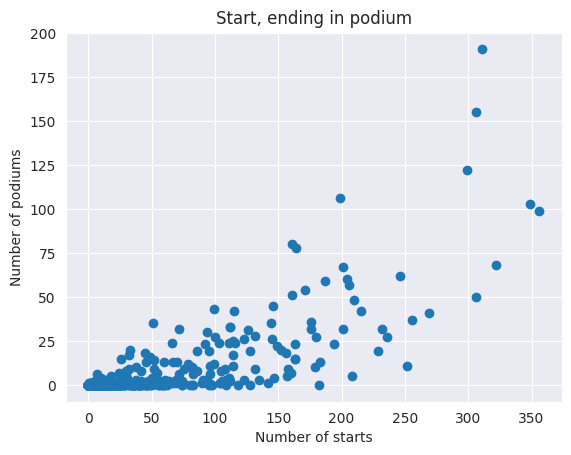

In [17]:
plt.scatter(drivers_df['Race_Starts'], drivers_df['Podiums'])
plt.xlabel('Number of starts')
plt.ylabel('Number of podiums')
plt.title('Start, ending in podium')
plt.show()

На данном графике распределение практически аналогично предыдущему графику,
но с небольшим изменением: для попадания на подиум в среднем требуется
меньшее количество стартов, чем для победы.

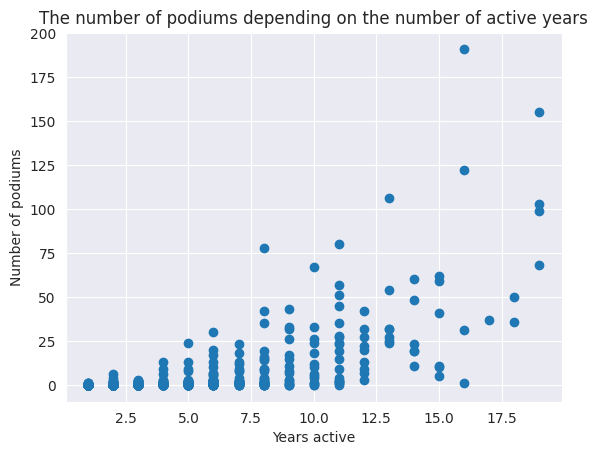

In [18]:
plt.scatter(drivers_df['Years_Active'], drivers_df['Podiums'])
plt.xlabel('Years active')
plt.ylabel('Number of podiums')
plt.title('The number of podiums depending on the number of active years')
plt.show()

На данном графике выражена группа до 12 лет участия в гонках, имеющая до 50
подиумов.

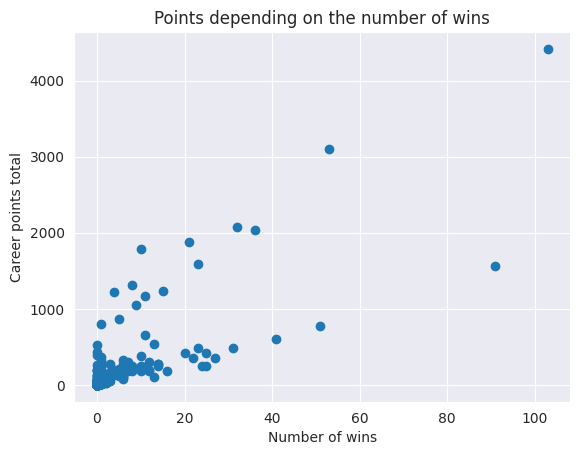

In [19]:
plt.scatter(drivers_df['Race_Wins'], drivers_df['Points'])
plt.xlabel('Number of wins')
plt.ylabel('Career points total')
plt.title('Points depending on the number of wins')
plt.show()

На графике выражена группа до 20 побед и количеством очков менее ~600.

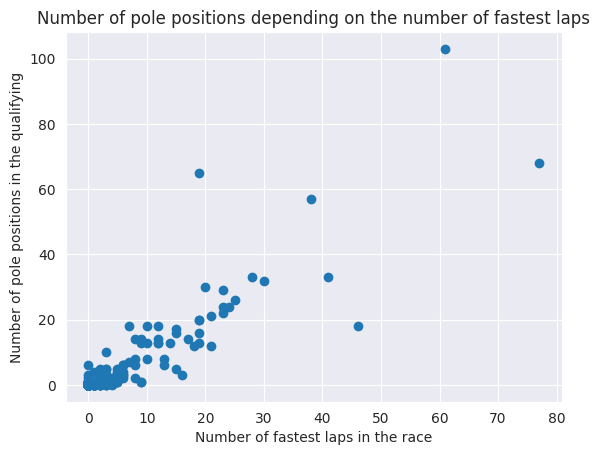

In [20]:
plt.scatter(drivers_df['Fastest_Laps'], drivers_df['Pole_Positions'])
plt.xlabel('Number of fastest laps in the race')
plt.ylabel('Number of pole positions in the qualifying')
plt.title('Number of pole positions depending on the number of fastest laps')
plt.show()

На графике выражена группа до 10 самых быстрых кругов в гонке, имеющая менее
10 поул-позиций. Также можно выделить еще одну группу: от 10 до 25 быстрых
кругов, имеющие от 10 до 30 поул-позиций.

In [21]:
from sklearn.cluster import KMeans
from sklearn import preprocessing


drivers_df_numeric = drivers_df.loc[:, ['Championships',
                                 'Race_Entries',
                                 'Race_Starts',
                                 'Pole_Positions',
                                 'Race_Wins',
                                 'Podiums',
                                 'Fastest_Laps',
                                 'Points',
                                 'Driver']
]
drivers_df_numeric.head()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Carlo Abate
1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,George Abecassis
2,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,Kenny Acheson
3,0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,Andrea de Adamich
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,Philippe Adams


In [22]:
minmax_processed = (preprocessing.MinMaxScaler().fit_transform
    (drivers_df_numeric.drop('Driver', axis=1))
)
drivers_df_numeric_scaled = (
    pd.DataFrame(minmax_processed, index=drivers_df_numeric.index,
                 columns=drivers_df_numeric.columns[:-1])
)
drivers_df_numeric_scaled.head()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points
0,0.0,0.005587,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.002793,0.005618,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.025140,0.008427,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.097765,0.084270,0.0,0.0,0.0,0.0,0.001359
4,0.0,0.002793,0.005618,0.0,0.0,0.0,0.0,0.000000


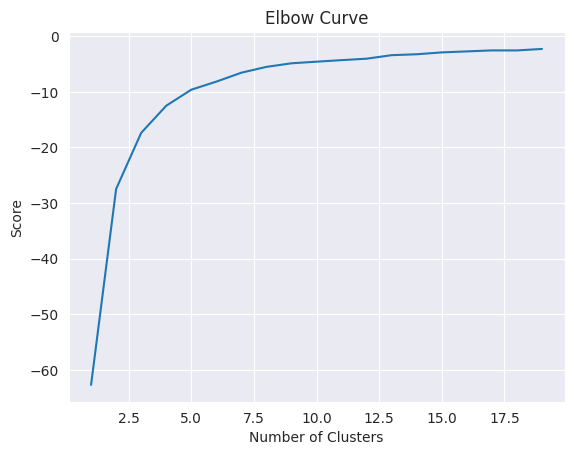

In [23]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in Nc]
score = [kmeans[i].fit(drivers_df_numeric_scaled)
         .score(drivers_df_numeric_scaled) for i in range(len(kmeans))
]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(drivers_df_numeric_scaled)
len(kmeans.labels_)

868

In [25]:
drivers_df_numeric['Cluster'] = kmeans.labels_
drivers_df_numeric.head()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Carlo Abate,0
1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,George Abecassis,0
2,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,Kenny Acheson,0
3,0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,Andrea de Adamich,0
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,Philippe Adams,0


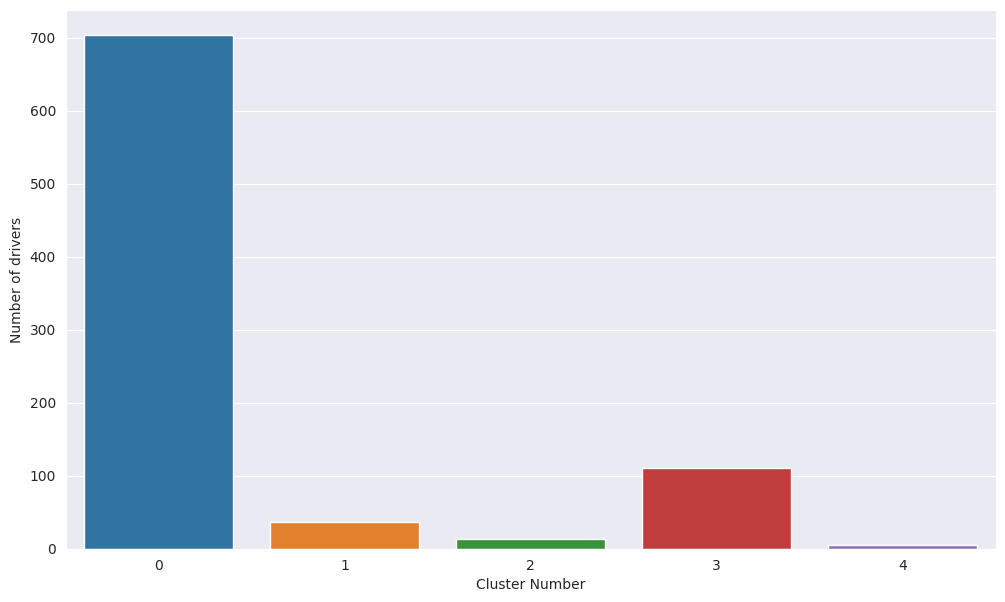

In [27]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),
                   y=drivers_df_numeric.groupby(['Cluster']).count()['Driver']
                   .values)
x=axis.set_xlabel("Cluster Number")
y=axis.set_ylabel("Number of drivers")

In [28]:
drivers_df_numeric.groupby(['Cluster']).mean(numeric_only=True)

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points
Cluster,,,,,,,,
0,0.001422,8.752489,7.146515,0.042674,0.055477,0.295875,0.058321,2.680569
1,0.194444,195.972222,192.111111,6.166667,5.944444,27.027778,7.611111,439.527778
2,2.538462,149.923077,147.384615,28.230769,27.846154,56.000000,23.076923,637.192308
3,0.099099,82.702703,77.135135,1.738739,1.513514,6.144144,2.117117,85.206216
4,4.200000,326.200000,324.200000,53.600000,60.000000,134.000000,49.000000,2605.700000


In [29]:
size_list = list(drivers_df_numeric.groupby(['Cluster']).count()['Driver']
                 .values)
size_list

[703, 36, 13, 111, 5]

In [37]:
df = (drivers_df_numeric[drivers_df_numeric['Cluster'] == 0]
    .sort_values('Points', ascending=False).head())
df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
239,1.0,34.0,33.0,5.0,5.0,20.0,5.0,115.33,Nino Farina,0
119,0.0,39.0,38.0,3.0,6.0,10.0,3.0,75.00,Tony Brooks,0
310,0.0,26.0,26.0,3.0,2.0,15.0,6.0,72.14,José Froilán González,0
650,0.0,32.0,30.0,1.0,2.0,8.0,0.0,61.00,Peter Revson,0
48,0.0,42.0,42.0,1.0,1.0,8.0,2.0,58.00,Lorenzo Bandini,0


In [38]:
df = (drivers_df_numeric[drivers_df_numeric['Cluster'] == 1]
    .sort_values('Points', ascending=False).head())
df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
100,0.0,202.0,201.0,20.0,10.0,67.0,19.0,1791.0,Valtteri Bottas,1
653,0.0,232.0,232.0,3.0,8.0,32.0,16.0,1311.0,Daniel Ricciardo,1
135,1.0,309.0,306.0,8.0,15.0,50.0,8.0,1235.0,Jenson Button,1
594,0.0,240.0,236.0,1.0,4.0,27.0,9.0,1219.0,Sergio Pérez,1
501,0.0,272.0,269.0,16.0,11.0,41.0,15.0,1167.0,Felipe Massa,1


In [43]:
df = (drivers_df_numeric[drivers_df_numeric['Cluster'] == 2]
    .sort_values('Points', ascending=False).head())
df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
811,2.0,164.0,164.0,21.0,36.0,78.0,21.0,2036.5,Max Verstappen,2
670,1.0,206.0,206.0,30.0,23.0,57.0,20.0,1594.5,Nico Rosberg,2
628,4.0,202.0,199.0,33.0,51.0,106.0,41.0,768.5,Alain Prost,2
720,3.0,162.0,161.0,65.0,41.0,80.0,19.0,610.0,Ayrton Senna,2
612,3.0,207.0,204.0,24.0,23.0,60.0,23.0,481.5,Nelson Piquet,2


In [40]:
df = (drivers_df_numeric[drivers_df_numeric['Cluster'] == 3]
    .sort_values('Points', ascending=False).head())
df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
446,0.0,104.0,103.0,18.0,5.0,24.0,7.0,868.0,Charles Leclerc,3
565,0.0,83.0,83.0,1.0,0.0,6.0,5.0,428.0,Lando Norris,3
568,0.0,112.0,112.0,0.0,1.0,2.0,0.0,364.0,Esteban Ocon,3
287,0.0,109.0,109.0,0.0,1.0,3.0,3.0,334.0,Pierre Gasly,3
536,0.0,95.0,94.0,13.0,7.0,30.0,12.0,307.0,Juan Pablo Montoya,3


In [41]:
df = (drivers_df_numeric[drivers_df_numeric['Cluster'] == 4]
    .sort_values('Points', ascending=False).head())
df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Driver,Cluster
338,7.0,311.0,311.0,103.0,103.0,191.0,61.0,4415.5,Lewis Hamilton,4
812,4.0,300.0,299.0,57.0,53.0,122.0,38.0,3098.0,Sebastian Vettel,4
17,2.0,359.0,356.0,22.0,32.0,99.0,23.0,2076.0,Fernando Alonso,4
635,1.0,353.0,349.0,18.0,21.0,103.0,46.0,1873.0,Kimi Räikkönen,4
710,7.0,308.0,306.0,68.0,91.0,155.0,77.0,1566.0,Michael Schumacher,4


После применения метода KMeans можно сделать следующие выводы.
Оптимальное количество кластеров для разбиения - 5.

Самая многочисленная с большим перевесом группа находится под номером 0. В
нее входят гонщики с довольно скромным количеством очков за карьеру: максимальное значение - 115
.33. Можно сказать, что это группа тех, кто слабо показал себя в гонках.

Вторая по размеру группа - кластер №3. В ней находятся гонщики с неплохими
результатами. В жизни - это молодые (или кто был молодым во время нахождения
в формуле 1) гонщики, способные показывать хороший результат, но пока что не
добившихся каких-либо высот в силу своей неопытности или проблем в команде.

Третья группа - кластер №1. В ней находятся гонщики с хорошими результатами и
большим количеством подиумов, однако, за редким исключением, не имеющих
большого количества побед в гонках и не имеющих выигранных чемпионств. В
жизни - это гонщики, которых часто называют вторым номером: они находятся в
хорошей команде, но она работает на напарника гонщика.

Четвертая группа - кластер №2. Она включает в себя гонщиков с высокими
результатами и победами в чемпионате.

Пятая группа - кластер №4. Она включает в себя самых результативных гонщиков
формулы 1 в истории, часто побивавших различные рекорды.